In [1]:
pip install tensorflow pandas matplotlib scikit-learn

  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 45.4/45.4 kB 4.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 227.0/227.0 MB 31.4 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.7/133.7 kB 10.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 57.5/57.5 kB 6.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 10.4/10.4 MB 43.4 MB/s eta 0:00:0000:010:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.9/2.9 MB 39.9 MB/s eta 0:00:00a 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 38.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 26.4/26.4 MB 41.6 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 389.8/389.8 kB 22.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 65.5/65.5 kB 7.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.5/5.5 MB 43.7 MB/s eta 0:00:0000:0100:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━

Epoch 1/1000


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 968ms/step - loss: 0.1378 - val_loss: 0.0629
Epoch 2/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 26ms/step - loss: 0.1234 - val_loss: 0.0493
Epoch 3/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1106 - val_loss: 0.0376
Epoch 4/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0990 - val_loss: 0.0275
Epoch 5/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0885 - val_loss: 0.0189
Epoch 6/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0789 - val_loss: 0.0121
Epoch 7/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0702 - val_loss: 0.0073
Epoch 8/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0627 - val_loss: 0.0051
Epoch 9/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0566 - val_loss: 0.0062
Epoch 10/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0525 - val_loss: 0.0114
Epoch 11/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0511 - val_loss: 0.0204
Epoch 12/1000
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0525 - val_lo

NameError: name 'millions' is not defined

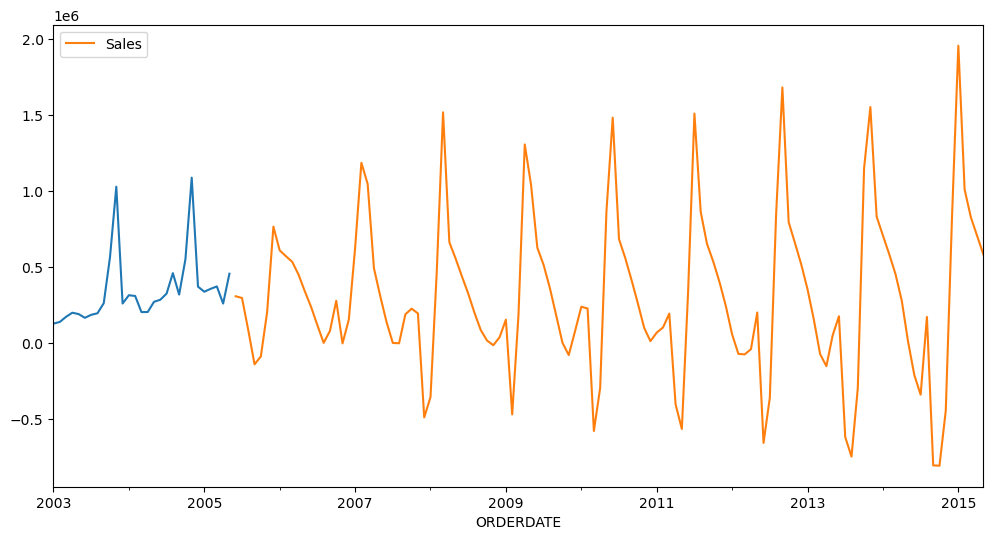

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Specify the path to the CSV file
csv_file_path = '/Users/alexemmons/Desktop/sales_data_sample.csv'

# Load the CSV file into a DataFrame with specified encoding
df = pd.read_csv(csv_file_path, encoding='ISO-8859-1')

# Parse dates and set 'ORDERDATE' as index
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df.set_index('ORDERDATE', inplace=True)

# Resample by month and sum the sales data
df_resampled = df['SALES'].resample('M').sum()

# Scale the data
scaler = MinMaxScaler()
df_resampled_scaled = scaler.fit_transform(df_resampled.values.reshape(-1, 1))

# Create sequences of data
sequence_length = 12  # 12 months (1 year)
X, y = [], []
for i in range(len(df_resampled_scaled) - sequence_length):
    X.append(df_resampled_scaled[i:i + sequence_length])
    y.append(df_resampled_scaled[i + sequence_length])

X = np.array(X)
y = np.array(y)

# Split into training and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=1000, batch_size=16, validation_data=(X_test, y_test))

# Make predictions for the next 10 years (120 months)
predictions = []
last_sequence = X_test[-1]

for _ in range(120):
    prediction = model.predict(last_sequence.reshape(1, sequence_length, 1))
    predictions.append(prediction[0, 0])
    last_sequence = np.append(last_sequence[1:], prediction, axis=0)

# Inverse transform the predictions to original scale
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Generate future dates
last_date = df_resampled.index[-1]
future_dates = pd.date_range(last_date, periods=121, freq='M')[1:]

# Create a DataFrame for the predictions
df_predictions = pd.DataFrame(data=predictions, index=future_dates, columns=['Sales'])

# Plot the resampled sales data and the predictions
plt.figure(figsize=(12, 6))
ax = df_resampled.plot(label='Historical Sales')
df_predictions.plot(ax=ax, label='Forecasted Sales')
ax.yaxis.set_major_formatter(FuncFormatter(millions))
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.title('Monthly Sales Data with Forecast')
plt.legend()
plt.show()


Epoch 1/500


/opt/anaconda3/lib/python3.11/site-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 922ms/step - loss: 0.1264 - val_loss: 0.0497
Epoch 2/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.1129 - val_loss: 0.0376
Epoch 3/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step - loss: 0.1009 - val_loss: 0.0261
Epoch 4/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0889 - val_loss: 0.0166
Epoch 5/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - loss: 0.0778 - val_loss: 0.0096
Epoch 6/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 52ms/step - loss: 0.0681 - val_loss: 0.0057
Epoch 7/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step - loss: 0.0600 - val_loss: 0.0058
Epoch 8/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step - loss: 0.0543 - val_loss: 0.0107
Epoch 9/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 20ms/step - loss: 0.0516 - val_loss: 0.0205
Epoch 10/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 21ms/step - loss: 0.0524 - val_loss: 0.0328
Epoch 11/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0558 - val_loss: 0.0419
Epoch 12/500
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 22ms/step - loss: 0.0591 - val_loss: 0.0445


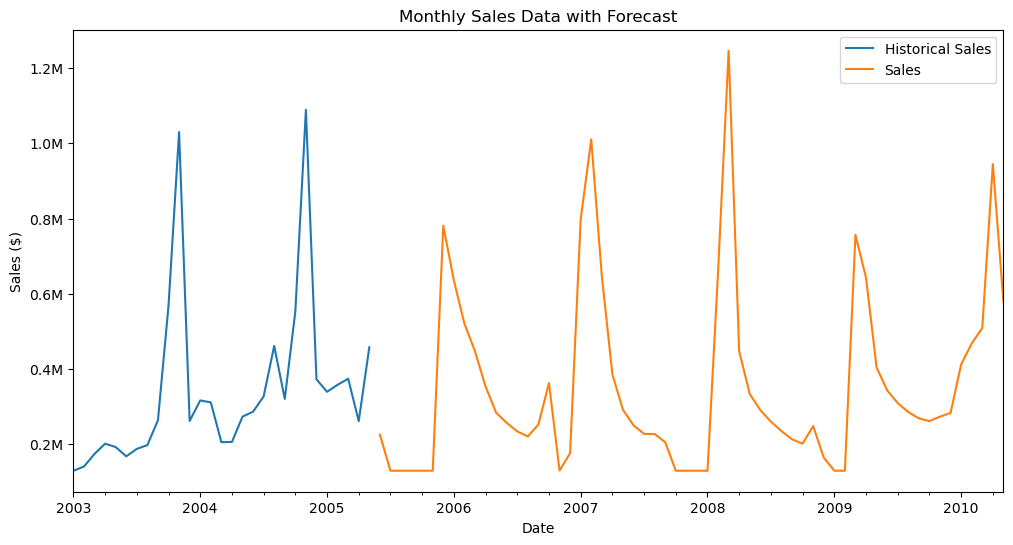

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.ticker import FuncFormatter
from sklearn.preprocessing import MinMaxScaler
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, ReLU

# Specify the path to the CSV file
csv_file_path = '/Users/alexemmons/Desktop/sales_data_sample.csv'

# Load the CSV file into a DataFrame with specified encoding
df = pd.read_csv(csv_file_path, encoding='ISO-8859-1')

# Parse dates and set 'ORDERDATE' as index
df['ORDERDATE'] = pd.to_datetime(df['ORDERDATE'])
df.set_index('ORDERDATE', inplace=True)

# Resample by month and sum the sales data
df_resampled = df['SALES'].resample('M').sum()

# Scale the data
scaler = MinMaxScaler()
df_resampled_scaled = scaler.fit_transform(df_resampled.values.reshape(-1, 1))

# Create sequences of data
sequence_length = 12  # 12 months (1 year)
X, y = [], []
for i in range(len(df_resampled_scaled) - sequence_length):
    X.append(df_resampled_scaled[i:i + sequence_length])
    y.append(df_resampled_scaled[i + sequence_length])

X = np.array(X)
y = np.array(y)

# Split into training and test sets
split = int(0.8 * len(X))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

# Build the LSTM model
model = Sequential()
model.add(LSTM(50, return_sequences=True, input_shape=(sequence_length, 1)))
model.add(LSTM(50))
model.add(Dense(1))
model.add(ReLU())  # Ensure non-negative predictions
model.compile(optimizer='adam', loss='mse')

# Train the model
model.fit(X_train, y_train, epochs=500, batch_size=16, validation_data=(X_test, y_test))

# Make predictions for the next 5 years (60 months)
predictions = []
last_sequence = X_test[-1]

for _ in range(60):
    prediction = model.predict(last_sequence.reshape(1, sequence_length, 1))
    prediction = max(0, prediction[0, 0])  # Ensure non-negative prediction
    predictions.append(prediction)
    last_sequence = np.append(last_sequence[1:], prediction).reshape(sequence_length, 1)

# Inverse transform the predictions to original scale
predictions = scaler.inverse_transform(np.array(predictions).reshape(-1, 1))

# Generate future dates
last_date = df_resampled.index[-1]
future_dates = pd.date_range(last_date, periods=61, freq='M')[1:]

# Create a DataFrame for the predictions
df_predictions = pd.DataFrame(data=predictions, index=future_dates, columns=['Sales'])

# Plot the resampled sales data and the predictions
plt.figure(figsize=(12, 6))
ax = df_resampled.plot(label='Historical Sales')
df_predictions.plot(ax=ax, label='Forecasted Sales')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x * 1e-6:.1f}M'))
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.title('Monthly Sales Data with Forecast')
plt.legend()
plt.show()



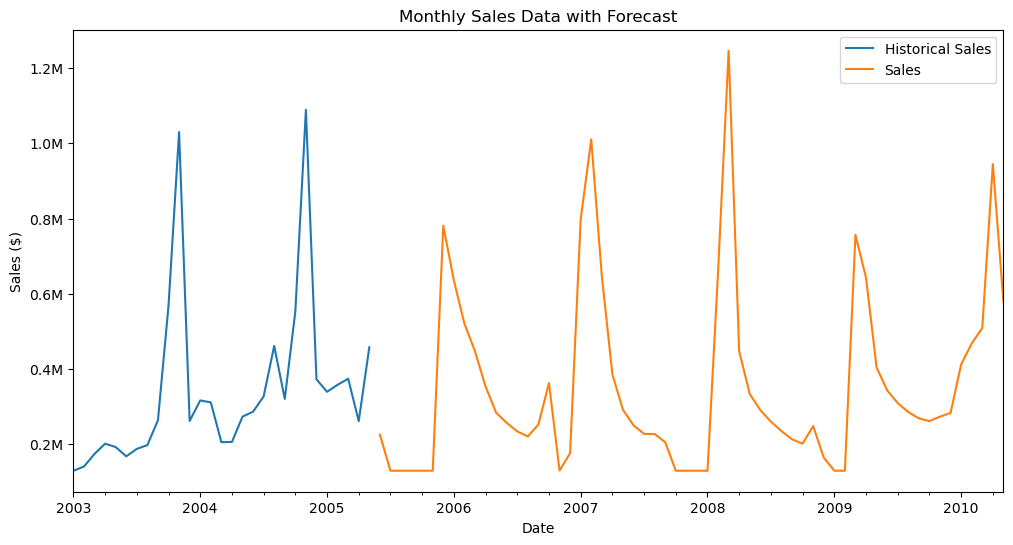

In [5]:
plt.figure(figsize=(12, 6))
ax = df_resampled.plot(label='Historical Sales')
df_predictions.plot(ax=ax, label='Forecasted Sales')
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, _: f'{x * 1e-6:.1f}M'))
plt.xlabel('Date')
plt.ylabel('Sales ($)')
plt.title('Monthly Sales Data with Forecast')
plt.legend()
plt.show()